In [1]:
import pandas as pd
import numpy as np
import sys, os, re
import matplotlib.pyplot as plt

In [2]:
result_dir = os.path.join('..', 'data_files', 'backtest_data', 'results')
value_dfs = []
for file in os.listdir(result_dir):
    search_string = r'([a-z]+?)_([a-z]+?)_([0-9.]+?)_([0-9.]+?)_([0-9.]+?).csv'
    result = re.search(search_string, file)
    if result:
        df_type, bal, buy_cut, sell_cut, max_invest = result.groups()
        if df_type == 'trade':
            continue
        value_df = pd.read_csv(os.path.join(result_dir, file))
        value_df['bal'] = bal == 'bal'
        value_df['buy'] = buy_cut
        value_df['sell'] = sell_cut
        value_df['max_invest'] = max_invest
        value_dfs.append(value_df)
all_value_df = pd.concat(value_dfs)

In [6]:
'''
Creates plots to compare the results of the strategies when grouped by a given
metric
'''
def compare(all_df, metric):
    mean_value = all_df.groupby(['date', metric]).apply(lambda df: df['value'].mean())
    mean_value.name = 'mean_value'
    mean_value = mean_value.to_frame().reset_index()
    fig, ax = plt.subplots()
    u_dates = pd.to_datetime(pd.Series(np.sort(all_df['date'].unique())))
    years = u_dates.dt.strftime('%Y').drop_duplicates()
    ax.set_ylabel('Mean Portfolio Value')
    ax.set_xlabel('Date')
    ax.set_xticks(years.index)
    ax.set_xticklabels(years.values, rotation=70)
    ax.set_title('Portfolio Value Over Different Strategies')
    for met_val, df in mean_value.groupby(metric):
        sorted_df = df.sort_values('date')
        ax.plot(sorted_df['date'], sorted_df['mean_value'], label=met_val)
    fig.set_size_inches(12, 10)
    fig.legend()

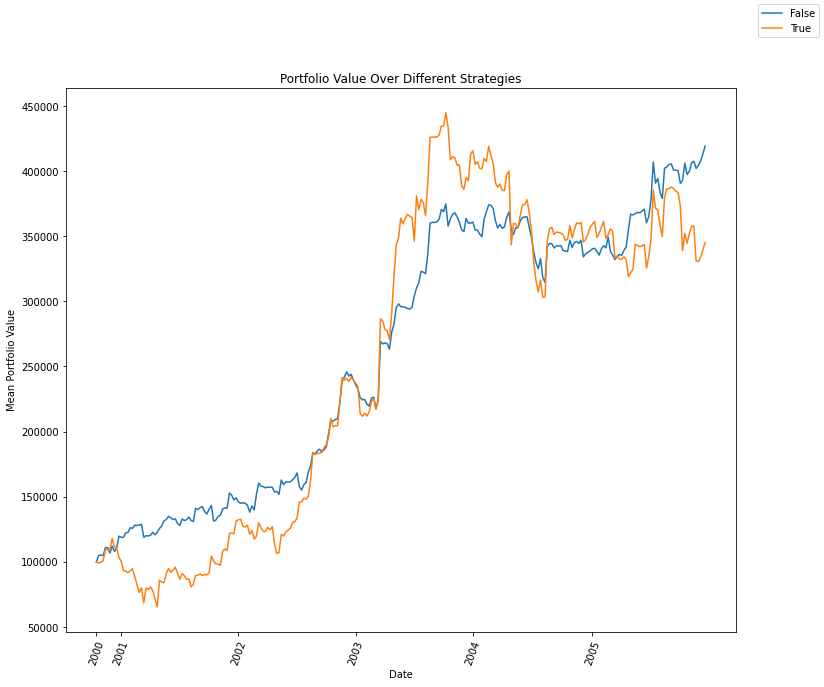

In [7]:
compare(all_value_df, 'bal')

In [5]:
all_value_df['date'].unique()


array(['2000-10-20', '2000-10-27', '2000-11-03', '2000-11-10',
       '2000-11-17', '2000-11-24', '2000-12-01', '2000-12-08',
       '2000-12-15', '2000-12-22', '2000-12-29', '2001-01-05',
       '2001-01-12', '2001-01-19', '2001-01-26', '2001-02-02',
       '2001-02-09', '2001-02-16', '2001-02-23', '2001-03-02',
       '2001-03-09', '2001-03-16', '2001-03-23', '2001-03-30',
       '2001-04-06', '2001-04-13', '2001-04-20', '2001-04-27',
       '2001-05-04', '2001-05-11', '2001-05-18', '2001-05-25',
       '2001-06-01', '2001-06-08', '2001-06-15', '2001-06-22',
       '2001-06-29', '2001-07-06', '2001-07-13', '2001-07-20',
       '2001-07-27', '2001-08-03', '2001-08-10', '2001-08-17',
       '2001-08-24', '2001-08-31', '2001-09-07', '2001-09-14',
       '2001-09-21', '2001-09-28', '2001-10-05', '2001-10-12',
       '2001-10-19', '2001-10-26', '2001-11-02', '2001-11-09',
       '2001-11-16', '2001-11-23', '2001-11-30', '2001-12-07',
       '2001-12-14', '2001-12-21', '2001-12-28', '2002-